In [2]:
pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 5.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics as mt

from statsmodels.tsa.arima.model import ARIMA

In [2]:
y_train = pd.read_csv('y_train_complete.csv', index_col=['date'], parse_dates=['date'])
y_test = pd.read_csv('y_test.csv', index_col=['date'], parse_dates=['date'])

In [3]:
y_train = pd.read_csv('y_train_complete.csv')
y_test = pd.read_csv('y_test.csv')

In [4]:
train_data = y_train[['reference_evapotranspiration']]
test_data = y_test[['reference_evapotranspiration']]

In [5]:
train_data_list = train_data.values.tolist()
test_data_list = test_data.values.tolist()

In [6]:
train_data_list, test_data_list

([[0.0585373667499999],
  [0.0485320319583333],
  [0.064638817125],
  [0.0723622035],
  [0.0483415317916666],
  [0.0520071012083333],
  [0.0421720670833333],
  [0.056362937625],
  [0.0497983688333333],
  [0.0491749308333333],
  [0.040022481125],
  [0.061603525875],
  [0.0535422692916666],
  [0.05453691175],
  [0.0515784663333333],
  [0.0463444437083333],
  [0.0727804297916666],
  [0.0519752139166666],
  [0.0434888700416666],
  [0.0275477400416666],
  [0.0480012325833333],
  [0.0568660850416666],
  [0.0490069833333333],
  [0.0621102809583333],
  [0.0574804377916666],
  [0.069811514125],
  [0.055917247875],
  [0.0481949567083333],
  [0.0638106683333333],
  [0.06892562175],
  [0.0429104647083333],
  [0.048016376375],
  [0.0640579883333333],
  [0.0744080900416666],
  [0.0825590733333333],
  [0.06613952025],
  [0.0751373087083333],
  [0.0672712591666666],
  [0.0511917225],
  [0.04401119325],
  [0.0412667575],
  [0.00660575975],
  [0.0214776457916666],
  [0.0393910366666666],
  [0.0290180128

In [7]:
train_list2 = []
for x in range(len(train_data_list)):
  for y in range(1):
     train_list2.append(train_data_list[x][y])
print(train_list2)

test_list2 = []
for x in range(len(test_data_list)):
  for y in range(1):
     test_list2.append(test_data_list[x][y])
print(test_list2)

[0.0585373667499999, 0.0485320319583333, 0.064638817125, 0.0723622035, 0.0483415317916666, 0.0520071012083333, 0.0421720670833333, 0.056362937625, 0.0497983688333333, 0.0491749308333333, 0.040022481125, 0.061603525875, 0.0535422692916666, 0.05453691175, 0.0515784663333333, 0.0463444437083333, 0.0727804297916666, 0.0519752139166666, 0.0434888700416666, 0.0275477400416666, 0.0480012325833333, 0.0568660850416666, 0.0490069833333333, 0.0621102809583333, 0.0574804377916666, 0.069811514125, 0.055917247875, 0.0481949567083333, 0.0638106683333333, 0.06892562175, 0.0429104647083333, 0.048016376375, 0.0640579883333333, 0.0744080900416666, 0.0825590733333333, 0.06613952025, 0.0751373087083333, 0.0672712591666666, 0.0511917225, 0.04401119325, 0.0412667575, 0.00660575975, 0.0214776457916666, 0.0393910366666666, 0.0290180128333333, 0.0315137983333333, 0.0330243237916666, 0.0265769458749999, 0.00777093675, 0.0109070339583333, 0.018256344875, 0.0292807244999999, 0.040434225625, 0.033128740375, 0.03212

In [8]:
model = ARIMA(train_list2, order=(0, 0, 1))
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [9]:
y_pred = model_fit.predict(start=len(train_list2)+1, end=len(train_list2)+len(test_list2))

print('RMSE = {}\nMAE  = {}\n'.format(
    np.sqrt(mt.mean_squared_error(test_list2, y_pred)), 
    mt.mean_absolute_error(test_list2, y_pred)))

RMSE = 0.03471410780835625
MAE  = 0.032288862180591224



In [10]:
len(y_pred)

67

In [11]:
x_axis = np.arange(0,67)
x_axis

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66])

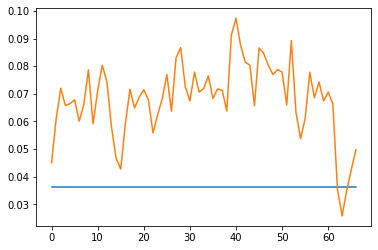

In [12]:
plt.plot(x_axis, y_pred)
plt.plot(x_axis, test_list2)